# Title : Sales data Prediction by Hrushik Perumalla (GH1032261)
# M504A AI and Applications (SS0624)





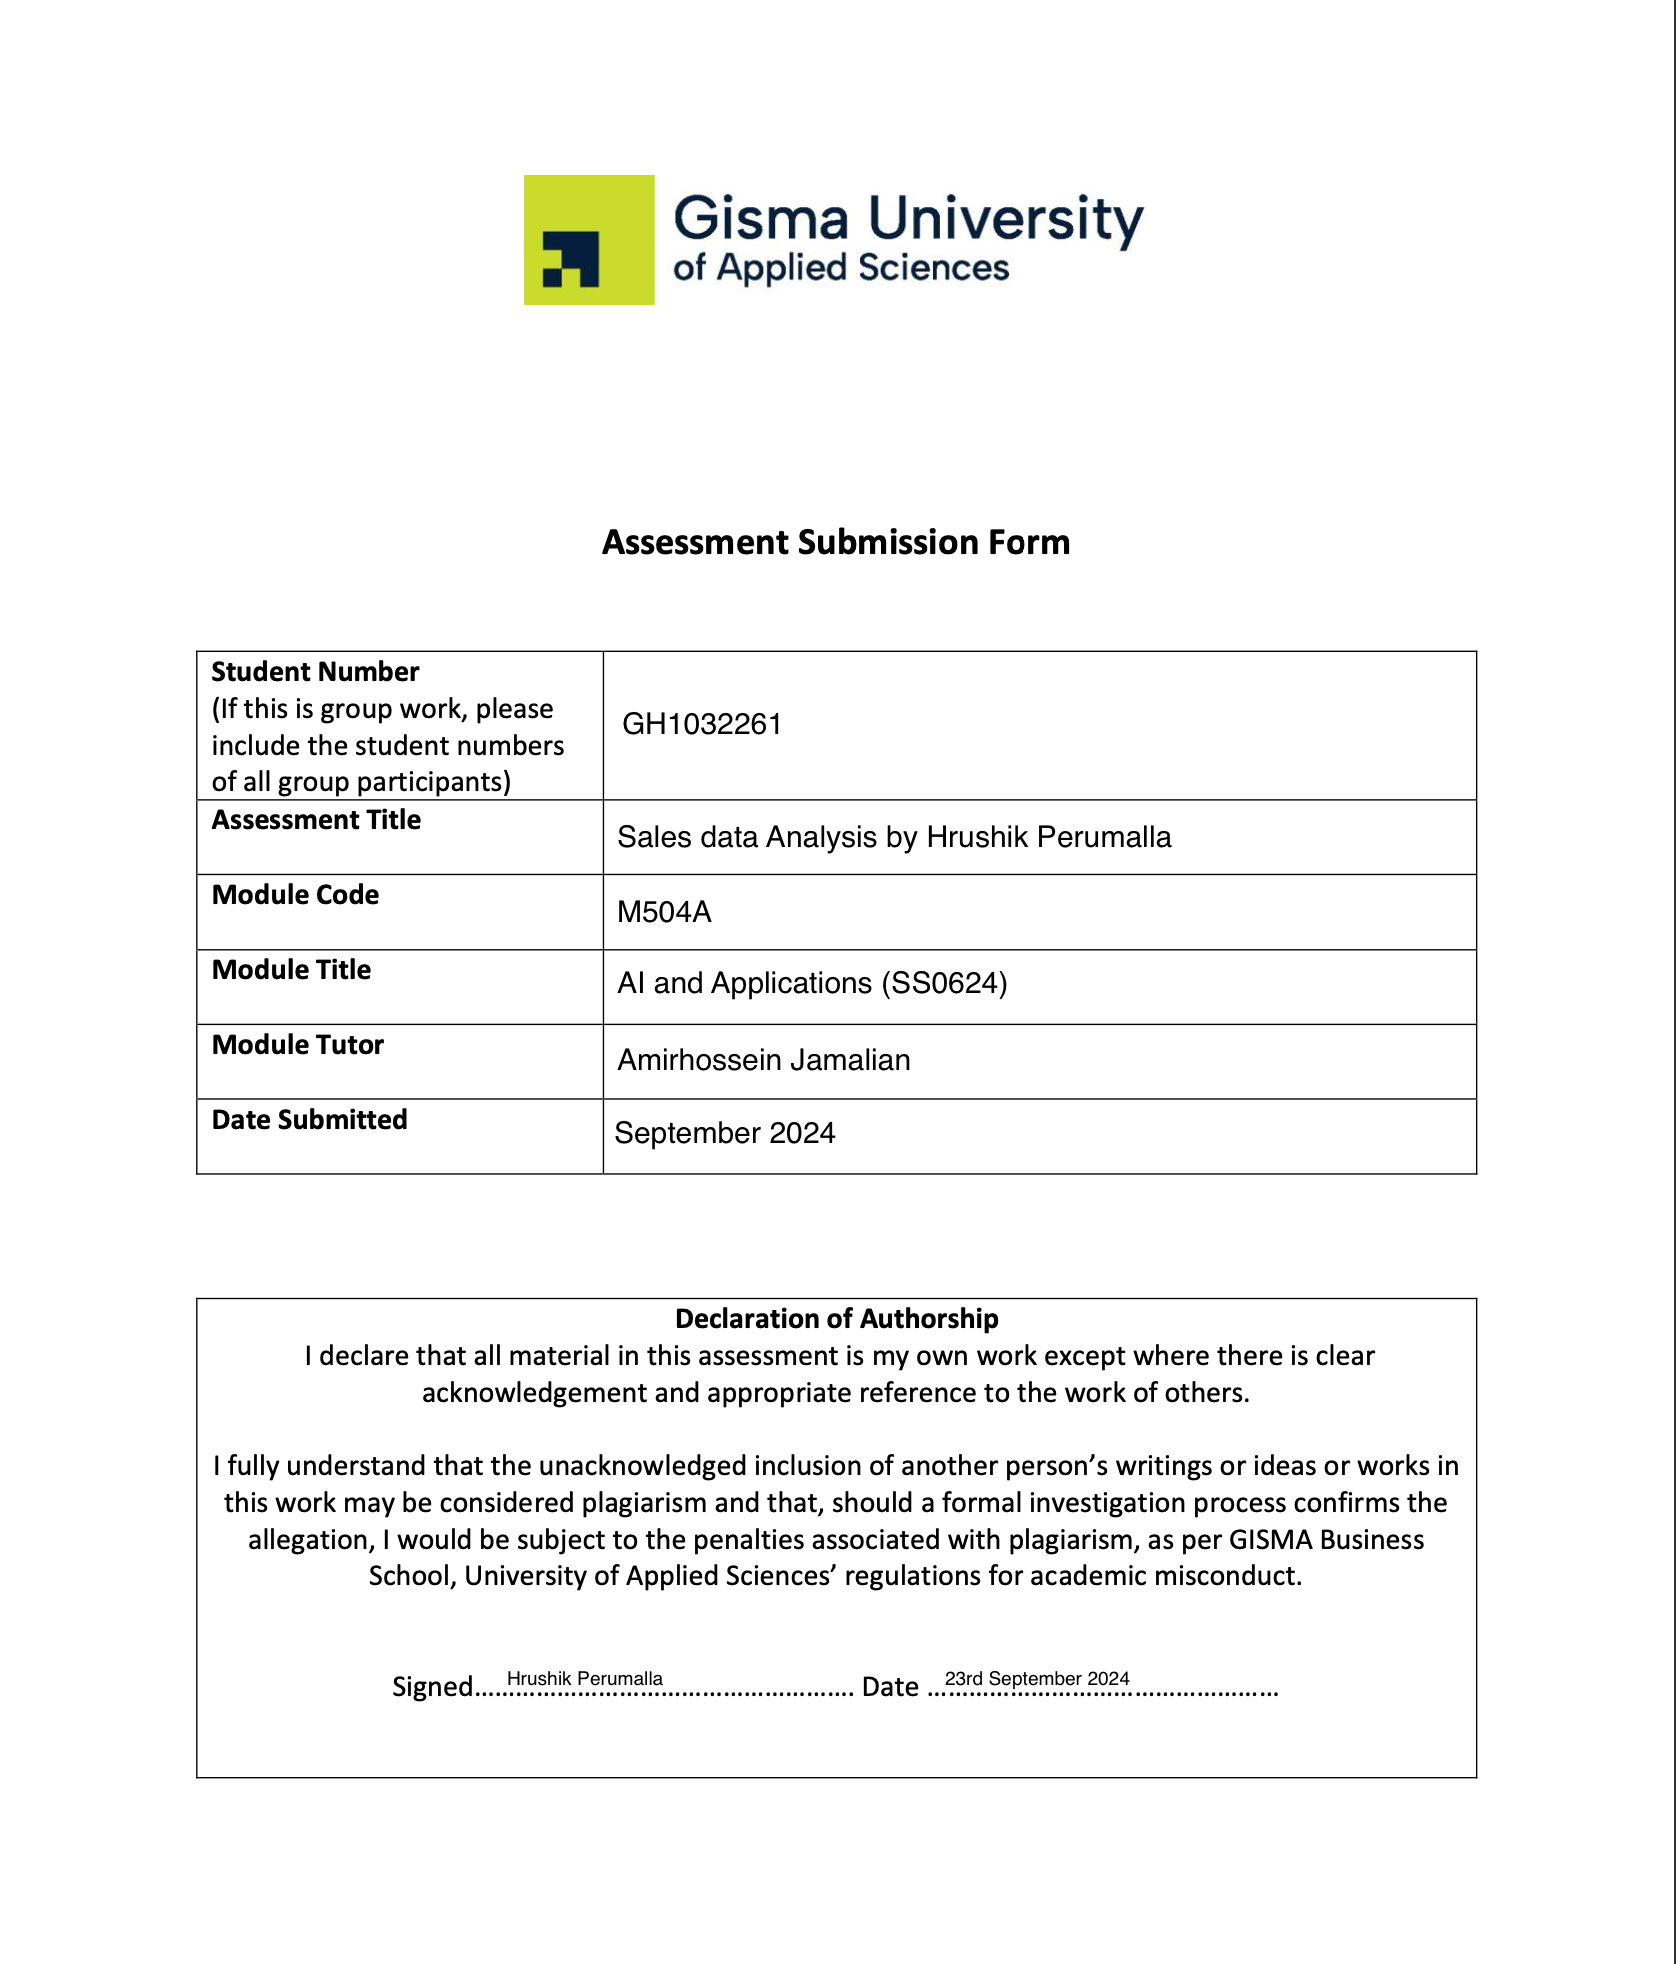

# Dataset Link
Article title
Superstore Sales

URL
https://www.kaggle.com/datasets/ishanshrivastava28/superstore-sales

Website title
Kaggle

Date accessed
September 23, 2024

Date published
August 18, 2023

# Dataset Description
This dataset contains a set of sales transaction data that includes 9994 rows of different attributes to do with customer orders. This is because the main constituents include parameters which are; Order ID, Order Date, and Ship Date as will form the basis of identifying the nature of the transaction done by the customer. Ship Mode explains the type of shipping class chosen, while the two variables Customer ID and Customer Name are identification numbers/labels of customers.

Some other key operational columns are Segment (Consumer, Corporate, etc.) and Geo Graphical details like Country, City, Postal Code & Region. Product ID contains information on the types of product which are available in the supermarket, the Category and Sub- Category identifies the specific product type, the Product Name is a name given to the product being sold is also included in the data base, the Sales indicate how much amount the supermarket has sold, the Quantity shows how many pieces of a specific product were sold, the Discount shows the amount of money for a product that has been discounted and the Profit shows

In sales perspective it offer valuable insights about the patterns of sales, customer inclination, profitability, and shipping optimization. It allows for better understanding of the nature of transactions made in terms of different products, customers, regions and others which make it effective for micro analysis for selling and marketing strategies.

# Business Context and Problem Statement

The client company is one of the biggest retailers with operations in different regions, and it deals with almost all types of goods, including furniture, office supplies, and information technology products. Their main source of data is a detailed database that contains records of all their sales processes, clients’ information, dispatch details, and product performance reports. This is a useful dataset regarding customer buying patterns, products’ sales performance, regions, and the effects of certain actions, for instance, promotions.
The management of the company has engaged a data scientist to analyze the sales data of the business. They need accurate analysis for setting the right price, managing stocks, and engaging customers efficiently. Furthermore, the firm seeks to know about the impact of factors like shipping channels, customer groups, and geographical factors on profitability. Employing data analysis methods, the work seeks to explore patterns that if used appropriately will improve business operations.
The client is a big retail firm with operations in diverse geographical locations and engaging in the sale of diverse products and services hence having a big challenge of actually analyzing its big sales data and making smart business decisions. Yet the company has accurate records of sales transactions, customer information, product type, and shipping records and cannot get valuable information to improve its pricing strategy, its stock, and use customer data. The management needs a brief identification of some important trends and drivers that affect the profitability through shipping methods, customers, and geographical regions. Further, they require such things as identifying product categories that generate maximum profit, the impact of price discounts on sales, and loss-making zones. The dataset contains sales volumes, discounts, margins, and order details but the dataset has some quality problems such as missing values and different formats. To overcome such barriers, there is need to develop a thorough explanatory data analysis pipeline. Such insight include the identification of which products yield greater margins, analyzing trends in revenue generation, and highlighting organizational weaknesses in various states and clients; this pipeline will further assist in making recommendations throughout business operation, profitability improvement and satisfying clients. By so doing, the company wants to use these insights to-optimize their operations and in a broader perspective, improve their competitiveness in the retail market.


# Business Question

Question 1: What are the top 5 most profitable product sub-categories?

Question 2: How do sales trends vary by year and month? Which months have the highest sales?

Question 3: Which customer segments (Consumer, Corporate, Home Office) generate the highest average profit per order?

Question 4: What is the distribution of discount rates? How do these rates affect overall sales and profits?

Question 5: Which states have the highest total sales? Does the profit align with the states that have the highest sales?

Question 6: What are the shipping durations for different shipping modes, and how do they correlate with sales or profit?

Question 7: Is there a correlation between the quantity of items sold and the discount offered?

Question 8: Who are the top 5 customers in terms of total sales, and how does their profit compare?

Question 9: What are the most frequently sold products in each region?

Question 10: Which product sub-categories experience the most loss (negative profit), and how often does this happen?


The dataset utilized in this case study is referred to as the “Superstore Sales,” which provided Sales Transaction Data, Customer Data, Shipping Data, Product Category Data, and Geographical data. Information to be stored includes order dates, segments of customers, sale volumes, discounts, and margins for profit which add value and are useful metadata. At first glance, the dataset may look fine with only minor signs of data quality problems that might have to be addressed. For instance, the given dataset has some missing values and different date formats. Furthermore, there may be some considerations to be made with the meaning of the columns, like discounts, and the ship duration, concerning the possible outlier treatment. In general, the indicated dataset is quite useful, which can be concluded from the mentioned available formats including time series and customer segments.

# Import necessary libraries


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

In [9]:
df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')
# Display the first few rows of the dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#Data Exploration


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [12]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
# Checking for missing values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [13]:
#checking for duplicate values
df.duplicated().sum()

0

In [14]:
df.nunique()

,0
Row ID,9994
Order ID,5009
Order Date,1238
Ship Date,1334
Ship Mode,4
Customer ID,793
Customer Name,793
Segment,3
Country,1
City,531


# Data Pre-processing

In the data preprocessing steps, several important actions were taken to ensure the dataset was ready for analysis:
Handling Missing Values: The first data preprocessing algorithm used was aimed at identifying missing values in the given dataset. Before cleaning the data, a check for null values was made to determine the level of blank entries (Maharana et al. 2012). This step is important since it assists in identifying which of the missing values should be imputed and which should be dropped which would otherwise cause bias in the results.
Date Formatting and Extraction: The data stored in the dataset contained fields, “Order Date” and “Ship Date”, which were initially in string format (Denny and Spirling, 2018.). These columns were then converted to datetime format appropriately using pd. to_datetime(). Next, new columns “Order Year” and “Order Month” were introduced by splitting “Order Date” field, making it possible to analyze sales and perform any other temporal analysis of data.
Feature Engineering: One of the preprocessing tasks involved was the computation of the “Shipping Duration”, which was obtained as the difference between “Ship Date” and “Order Date.” As a result of calculation, further analysis of shipping performance for affecting the sales and profitability could be made.
Handling Categorical Data: There were several categorical variables in the dataset like “ Sub-Category,” “State,” “Segment,” and “Region.” These variables were subjected to grouping operations in order to derive aggregate measures (say, total profit, sales) which are required for the analysis. This made it possible to derive patterns like the product sub-categories that had the highest sales and revenue, and how varied states ranked in terms of sales (Ngiam and Khor, 2019).
These preprocessing steps made the dataset clean, standardized, and enriched for the next phase of Explanatory Data Analysis, in which sales performance, profitability, and customer behaviour are explained.


# Preprocessing

In [ ]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y')
# Adding Year and Month columns for time-based analysis
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

# Exploratory data analysis

In the Exploratory Data Analysis (EDA) phase, several key steps were employed to uncover patterns, relationships, and insights from the dataset:
Profitability Analysis by Sub-Category: The first step of the analysis to arrive at the ideal proto was to determine and list the 5 most profitable product sub-categories (Verbeeck et al. 2020). This was done by sorting the data by “Sub-Category” column and then summing the total profit for each of the subcategories. These were then arranged in descending order and the sub-categories that emerged as the most profitable were Copiers and Phones and this helped ascertain well performing product categories.
Sales Trends by Year and Month: In order to analyze the change in sales the “Order Year” and “Order Month” categories were used for data segmentation. ; Hereby the summation of total sales per month was performed and depicted in a line graph. This step made it possible to see the patterns of the sales for a particular month where the result indicated that the months of November and December had high results probably due to the holiday season.
Profitability by Customer Segment: To get an average profit per order for the Consumer, Corporate, Home Office segments the dataset was sorted by the “Segment” column. This view made it easier to determine the customer segments that were most profitable to the organization and they included the Home Office and the Corporate segment (Sahoo et al. 2019).
Discount Distribution and Impact on Profit: The frequency distribution of discount rates from current transactions was also made in the form of histogram. Discount rates were regressed against both, profit and sales. Published measures relating to price discount and profitability levels revealed that lower prices volume and higher levels of discounts had a negative impact on profit levels, of significance to pricing strategies.
Geographical Analysis of Sales and Profit: Ranking was done according to total sales and profit earned in the various states. This step showed that the company with high sales could have low profits, as was seen for example in Texas where the efficiency was being criticised (Konopka et al. 2018).
Shipping Duration and Its Correlation with Profit and Sales: Time taken in shipping was evaluated and the impact on the sales and the profit was observed. This result, however low, showed that shipping time pose little risk to total profitability or sales.
These steps produced feedbacks for the business ends with profitability, sales trends, and customer behaviour.


# Question 1: What are the top 5 most profitable product sub-categories?

In [ ]:
# Group by 'Sub-Category' and calculate total profit
sub_category_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
# Display the top 5 most profitable sub-categories as a table
sub_category_profit.head(5)

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633


Based on the findings, Copiers, Phones and Accessories, Paper and Binders are the five most profitable sub-categories of products. Copiers have a gross profit of $165618 average profit and Phones have a gross profit of $44516. These categories perform significantly higher than others thereby suggesting that, in the business, high-technology and office products bring in higher revenues.

# Question 2: How do sales trends vary by year and month? Which months have the highest sales?

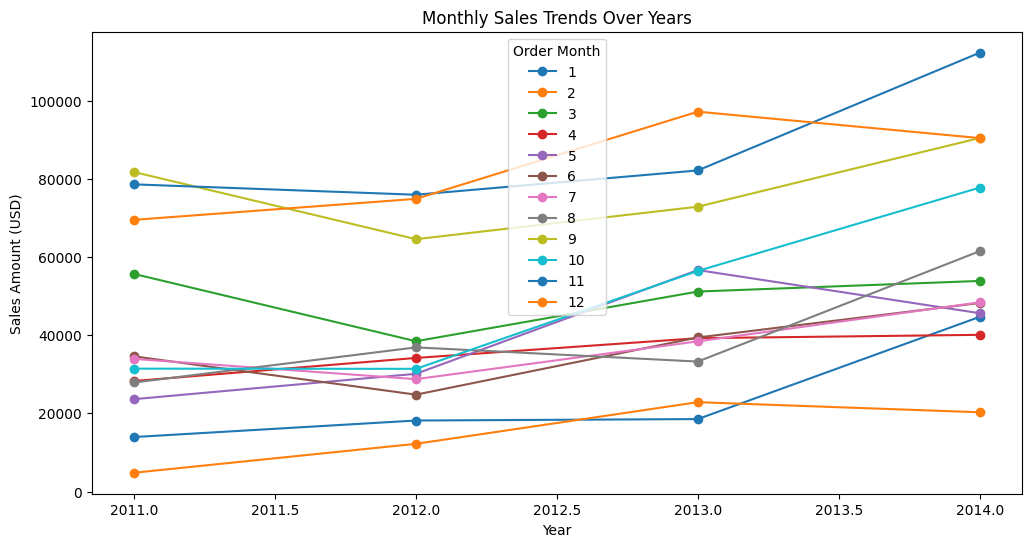

,Sales
Order Month,
11,349120.0740
12,332177.1595
9,309770.0997
3,199252.9840
10,197115.2017


In [ ]:
# Grouping sales by year and month
monthly_sales = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().unstack()

# Plotting the sales trend by month and year
monthly_sales.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Monthly Sales Trends Over Years')
plt.ylabel('Sales Amount (USD)')
plt.xlabel('Year')
plt.show()

# Displaying the months with the highest sales
df.groupby('Order Month')['Sales'].sum().sort_values(ascending=False).head()


The monthly and yearly analysis of sales shows that the three months where most sales are recorded are November, December and September with November having recorded close to $349,120 in sales. These months demonstrate higher than-average sales, probably because of Christmas and end-of-year purchases. On the other hand, March and October saw moderate sales with variability in sales for the other months of the year.

# Question 3: Which customer segments (Consumer, Corporate, Home Office) generate the highest average profit per order?

In [ ]:
# Grouping by 'Segment' and calculating average profit per order
segment_profit = df.groupby('Segment')['Profit'].mean()

# Displaying average profit per customer segment as a table
segment_profit


,Profit
Segment,
Consumer,25.836873
Corporate,30.456667
Home Office,33.818664


The order from a “Home Office” made $33.82, on average and the one from “Corporate” was $30.46 on average. The “Consumer” segment orders have the least amount of profit per order at $25.84. This suggests that for Home Office and Corporate segments are generating higher profits per transaction.

# Question 4: What is the distribution of discount rates? How do these rates affect overall sales and profits?

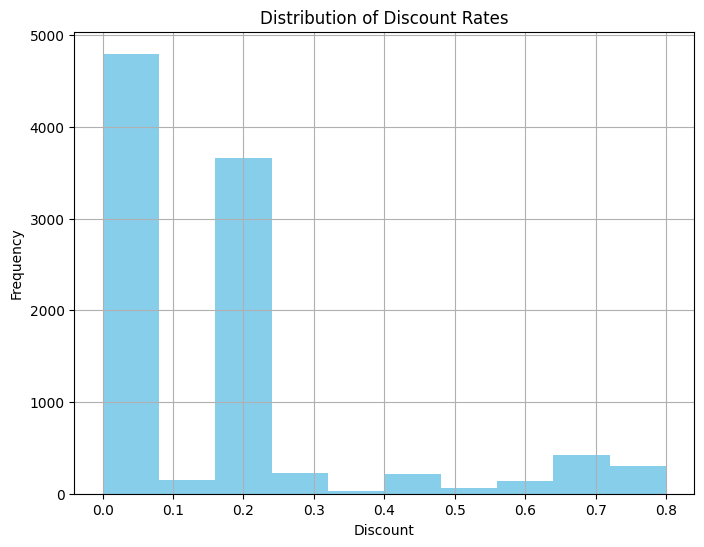

Correlation between Discount and Profit: -0.21948745637176803
Correlation between Discount and Sales: -0.028190124157535506


In [ ]:
# Plotting a histogram for discount distribution
plt.figure(figsize=(8, 6))
df['Discount'].hist(bins=10, color='skyblue')
plt.title('Distribution of Discount Rates')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

# Correlation between discount and profit/sales
print("Correlation between Discount and Profit:", df['Discount'].corr(df['Profit']))
print("Correlation between Discount and Sales:", df['Discount'].corr(df['Sales']))


The distribution of discounts shows that the majority of the transactions have no or only discounts of between 10% and 20%. Pricing below cost more than 30% is not common in businesses. A negative relationship between discount and profit (-0.22) indicates that more discounts have the effect of decreased profitability while the value of discount sales (-0.03) displays a minor effect on the amount of sales.

# Question 5: Which states have the highest total sales? Does the profit align with the states that have the highest sales?

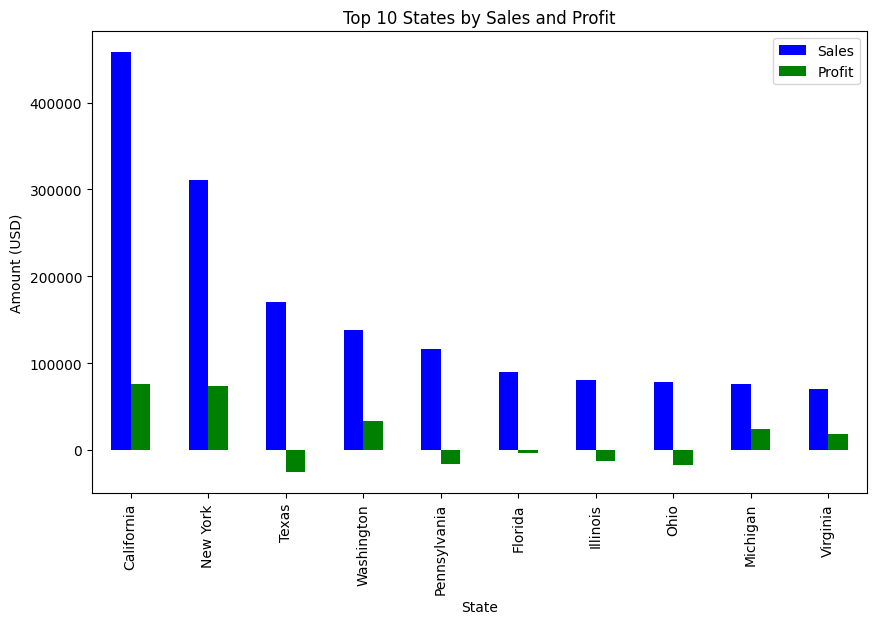

In [ ]:
# Grouping by 'State' to calculate total sales and profit
state_sales_profit = df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Display top 10 states by sales
state_sales_profit.head(10)

# Plotting the sales and profit for the top states
state_sales_profit.head(10).plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title('Top 10 States by Sales and Profit')
plt.ylabel('Amount (USD)')
plt.show()


According to the analysis, California states have the highest sales and profit by other states like New York and Texas states. However, some states that record high sales like Texas do not record proportional profit implying that there could be inefficiencies. This implies that the sales volume does not necessarily translate to profitability in the different states.

# Question 6: What are the shipping durations for different shipping modes, and how do they correlate with sales or profit?

In [ ]:
# Calculate shipping duration as the difference between 'Ship Date' and 'Order Date'
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
# Group by shipping mode to calculate average shipping duration
shipping_duration = df.groupby('Ship Mode')['Shipping Duration'].mean()
# Display the average shipping duration for each mode as a table
shipping_duration

,Shipping Duration
Ship Mode,
First Class,2.182055
Same Day,0.044199
Second Class,3.240103
Standard Class,5.007205


In [ ]:
# Correlation between shipping duration and profit/sales
print("Correlation between Shipping Duration and Profit:", df['Shipping Duration'].corr(df['Profit']))
print("Correlation between Shipping Duration and Sales:", df['Shipping Duration'].corr(df['Sales']))

Correlation between Shipping Duration and Profit: -0.004683463655585385
Correlation between Shipping Duration and Sales: -0.007328746986554136


As can be deduced from the route ton miles model, “Same Day” has the least time, that is 0.04 days while “Standard Class” is the longest at 5 days. The coefficients between shipping duration and both profitability (-0.0047) and quantity of sale (-0.0073) are minimal, as such, there is evidence that shipping time does not significantly affect the quantity of sales or profitability of the products.

# Question 7: Is there a correlation between the quantity of items sold and the discount offered?

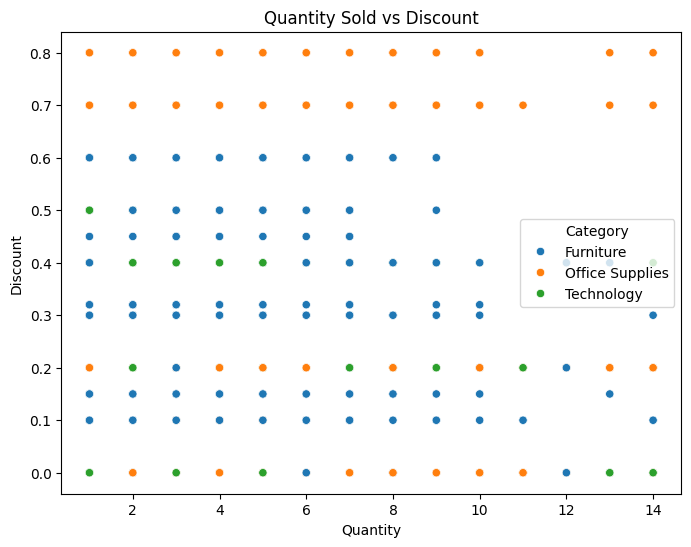

Correlation between Quantity and Discount: 0.008622970271156561


In [ ]:
# Plotting scatter plot for quantity vs discount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='Discount', data=df, hue='Category')
plt.title('Quantity Sold vs Discount')
plt.xlabel('Quantity')
plt.ylabel('Discount')
plt.show()
# Calculate correlation between quantity and discount
print("Correlation between Quantity and Discount:", df['Quantity'].corr(df['Discount']))


The scatter plot reveals that there is a negligible relationship (0.0086) between the number of products sold and the amount of discounts given. Each product category displays numerous discounts with various quantities sold, however the general correlation between the two is rather low, which suggests that higher discounts do not directly lead selling volumes.

# Question 8: Who are the top 5 customers in terms of total sales, and how does their profit compare?

In [ ]:
# Group by 'Customer Name' to calculate total sales and profit
customer_sales_profit = df.groupby('Customer Name')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
# Display the top 5 customers by sales
customer_sales_profit.head(5)

,Sales,Profit
Customer Name,,
Sean Miller,25043.050,-1980.7393
Tamara Chand,19052.218,8981.3239
Raymond Buch,15117.339,6976.0959
Tom Ashbrook,14595.620,4703.7883
Adrian Barton,14473.571,5444.8055


The five largest customers in terms of total purchase volumes are Sean Miller, Tamara Chand, Raymond Buch, Tom Ashbrook, and Adrian Barton. Sean miller leads in sales and shows a negative profit which may mean a loss. On the same note, while Rumsey has negative figures for gross profit, Tamara Chand, Raymond Buch, and others have positive profits meaning they are more profitable.

# Question 9: What are the most frequently sold products in each region?

In [ ]:
# Grouping by Region and Product Name to calculate total quantity sold
region_product_sales = df.groupby(['Region', 'Product Name'])['Quantity'].sum().reset_index()
# Find the most frequently sold product in each region
most_sold_products = region_product_sales.loc[region_product_sales.groupby('Region')['Quantity'].idxmax()]
# Display the most frequently sold products by region
most_sold_products

,Region,Product Name,Quantity
1045,Central,Staples,249
2431,East,Staples,267
3531,South,Staples,144
4938,West,Staples,216


The item that is most popular in each area is “Staples,” which sold the highest quantity in East (267 units), Central (249 units), West (216 units) and South (144 units). This top product consistently sold across regions can indicate that Staples enjoys high demand throughout the United States.

# Question 10: Which product sub-categories experience the most loss (negative profit), and how often does this happen?

In [ ]:
# Filter for products with negative profit
negative_profit_products = df[df['Profit'] < 0]
# Group by sub-category and count occurrences of negative profit
loss_sub_categories = negative_profit_products.groupby('Sub-Category')['Profit'].count().sort_values(ascending=False)
# Display the sub-categories with the most loss
loss_sub_categories.head(5)

,Profit
Sub-Category,
Binders,613
Chairs,235
Tables,203
Furnishings,167
Storage,161


The losses are the most in the sub-categories of “Binders” in 613 occurrences, followed by “Chairs” in 235, “Tables” in 203, “Furnishings” in 167, and “Storage” in 161. These numbers point towards a substantially strained monetary situation, with Binders as the most common product sub-category that exhibits losses.

# Discussion and Conclusion

The results pointed to several dimensions of profit, sales, customers, and productivity to the center as they are critical.
Top 5 Most Profitable Product Sub-Categories: The study also showed that, there is a greater profit on several sub-categories which are Copiers, Phones, and Accessories among them Copiers posted the highest profit. From this it is evident that the company should purchase more of high-technology and office supplies in order to increase its profits. Hence, investing in these product lines, and exploring stock management innovative ways can guarantee high revenues than expected.
Sales Trends by Year and Month: The data revealed that there is generally high level of sales during November, December and September this is in one accord with the holiday sessions. We see that for this type of business, there’s a higher demand in these months, which means marketing and, probably, inventory preparation earlier in the year can be a good strategy to increase sales.
Customer Segment Profitability: When identifying the characteristics of customer segments four segments were distinguished, and according to the given findings, Home Office and Corporate segments have the highest average profit per order. This means that the company should target these segments more, maybe come up with some special offers in order to increase the profitability of the segments further.
Impact of Discounts on Profit and Sales: It was also showed that efficiency rates has negative relationship with the discount rates in a way that high discounts are resulted in low profit margins. However, it is noted that the impact which discounts generated was on volume sales was not a very significant one at that. This means that price cutting competition is not probably severe and therefore steps can be taken to avoid it affecting their margins.
Geographical Performance: The California state had the highest sales and profit margin followed by other states like Texas which though had high sales had low profit which shows that there must have been compromise. This implies that the company should look at operating costs such as cost of sales, distribution and administrative expenses in such states in order to boost the profitability level.
Shipping Duration and Impact: A scarce relationship between shipping durations and both the sales and profit completely indicates that increased delivery speed does not affect the buying behavior of the customers. The second benefit is that it provides the organization a chance to dedicate most of its efforts towards enhancing and optimizing other aspects of operation.
Correlation Between Quantity Sold and Discount Offered: The above result of the scatter plot and correlation test shows that the amount of the items sold has a virtually zero correlation with the discount provided. The correlation coefficient was insignificant and the value equaled approximately to zero, thus meaning that substantially large discounts do not result into more sales. This study indicates that the company does not require embracing use of the discount offers so much in influencing demand as it does not influence qty sold greatly.
Top 5 Customers in Terms of Total Sales and Profit Comparison: Five customer accounts were found most frequent in their purchase with Sean Miller as the customer who has the highest total sales but recorded a negative gross profit. This suggests that although a number of customers have high purchasing power and contribute highly to the total sales then can indeed be non-profitable. The business should check the profitability of the large customers and in some cases reconsider the stand on pricing as well as discounts for the large customers. On the other hand, customer such as Tamara Chand and Raymond Buch have high volume that yield high sales yet post positive profits meaning that they are valuable customers that must be retained.
Most Frequently Sold Products in Each Region: Staples were determined to be experienced as offering the highest levels of stock renewal frequency internally as well as across regions. This consistent demand of Staples shows that the company can do some inventory planning as to always keep Staples in stock in all its regions. This is an account of why it may be effective to direct the efforts to marketing and promotions to these products that are most popular among the consumers.
Product Sub-Categories with the Most Losses: The findings showed that among the sub-categories, Binders, Chairs and Tables are the three most often reported lost. This implies that these product lines are not fully optimized; it can be as a result of their pricing model, unit costs, or demand. Some of these product categories may have been in the red for some reasons the company needs to establish and correct such that the losses will reduce or even eliminated completely, maybe through changes on the prices, or less stock.
In sum, all the business questions asked were answered and all organisational problems solved with an array of possibilities that would enhance on profitability, customer relations and overall organisational productivity.
Conclusion
The data collected was useful in evaluating the sale performance of the company, the level of profitability and understanding the consumers. Some of the salient facts are; The Copiers and Phones being highly profitable subcategories The business’s peak during November and December They identified the Home Office and Corporate categories as being the most profitable. Moreover, cost-savings reduce profits and poor performances in such states as Texas as well as such product categories as Binders lead to losses. As such, for the company, it is recommended to increase the concentration on the enhancement of its profitable product portfolios, the fine-tuning of discount policies, and the correction of various organizational issues that would affect the overall business success.


# Bibliography

Bhope, H., Mahajan, Y., Deore, S. and Jethani, V., 2020. Association Mining for Super Market Sales using UP Growth and Top-K Algorithm. In ITM Web of Conferences (Vol. 32, p. 03012). EDP Sciences.
Hendriksen, A., Jansen, R., Dijkstra, S.C., Huitink, M., Seidell, J.C. and Poelman, M.P., 2021. How healthy and processed are foods and drinks promoted in supermarket sales flyers? A cross-sectional study in the Netherlands. Public Health Nutrition, 24(10), pp.3000-3008.
Jablonski, B.B., Hadrich, J., Bauman, A., Sullins, M. and Thilmany, D., 2022. The profitability implications of sales through local food markets for beginning farmers and ranchers. Agricultural Finance Review, 82(3), pp.559-576.
Maharana, K., Mondal, S. and Nemade, B., 2022. A review: Data pre-processing and data augmentation techniques. Global Transitions Proceedings, 3(1), pp.91-99.
Denny, M.J. and Spirling, A., 2018. Text preprocessing for unsupervised learning: Why it matters, when it misleads, and what to do about it. Political analysis, 26(2), pp.168-189.
Ngiam, K.Y. and Khor, W., 2019. Big data and machine learning algorithms for health-care delivery. The Lancet Oncology, 20(5), pp.e262-e273.
Verbeeck, N., Caprioli, R.M. and Van de Plas, R., 2020. Unsupervised machine learning for exploratory data analysis in imaging mass spectrometry. Mass spectrometry reviews, 39(3), pp.245-291.
Sahoo, K., Samal, A.K., Pramanik, J. and Pani, S.K., 2019. Exploratory data analysis using Python. International Journal of Innovative Technology and Exploring Engineering, 8(12), pp.4727-4735.
Konopka, B.M., Lwow, F., Owczarz, M. and Łaczmański, Ł., 2018. Exploratory data analysis of a clinical study group: Development of a procedure for exploring multidimensional data. PloS one, 13(8), p.e0201950.
Panda, B., Panigrahi, C.R. and Pati, B., 2022. Exploratory data analysis and sentiment analysis of drug reviews. Computación y Sistemas, 26(3), pp.1191-1199.
